# **[LS22] UC Berkeley Admission Rate**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR VERSION
## Part 2: Exploratory Data Analysis (EDA) and Observations




## Takeaways (INSTRUCTOR ONLY)
In this lab, we aim to prepare students for utilizing data science and decision making skillsets with the UC Berkeley 1973 Graduate Admission
Rate dataset. The objectives of this lab are as follows:


- **Heuristics**:
  - Understand and apply heuristics in decision-making, while identifying and avoiding biases like Base Rate Neglect, Representativeness Heuristic, Conjunction Fallacy, and Availability Heuristic.
  - Learn the fundamentals of Bayesian reasoning to enhance judgment and decision-making skills.

- **Confirmation Bias**:
  - Be aware of the tendency to favor existing beliefs, even against evidence.
  - Learn about selective exposure and biased assimilation, and how to mitigate confirmation bias by seeking counter-evidence.

A university's admission is related to the different aspects of the society, and often becomes a good reflection on societal's values and dynamic. For this part of the assignment, we will be working with a segment of **UC Berkeley's 1973 graduate admission data** to further explore how gender (recorded binary: Female and Male during 1973) plays a role in admission.

In *Part 1: Observation and Instrumentation*, we explored the data from a less objective lens by making obsersvations, claims, and credence levels to what we thought the dataset represented simply by taking glances at the raw data. In this part, we will get the chance to really dive into the data by performing Exploratory Data Analysis.

Exploratory Data Analysis, or EDA for short, is the process of analyzing/summarizing data to extract valuable insights and patterns that can help guide further analysis. EDA is usually performed at the beginning of a data science project and helps to guide the direction of the analysis. EDA allows us to gain an understanding of the data, identify any patterns or anomalies, and detect any potential issues that may affect the analysis. In the following problems, we will perform EDA on our admission rates dataset.

## **Question 1: Exploring the Data**

Let's jog our memories from *Part 1* and perform EDA on our data.

**Question 1.1)** Like last lab, load the *```berkeley.csv```* dataset below.

In [2]:
# Instructor_only / Solution

berkeley = pd.read_csv('berkeley.csv')
berkeley.head(15)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


As we saw in *Part 1*, only using our senses can be very limiting in our ability to accurately describe the story that our dataset is trying to tell. Thus, let's utilize instruments such as `pandas`, `numpy`, and `matplotlib` to paint a better picture!

**Question 1.2)** Using *`berkeley.csv`*, calculate the admission rates of Female vs. Male applicants. Note that `female_admission_rate` and `male_admission_rate` should have `float` values.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Conditional selection may be useful here: https://ds100.org/course-notes/pandas_2/pandas_2.html#conditional-selection</i>
- <i>Consider breaking the problem down into separate calculations. For example: total number of female applicants, total number of male applicants, total number of accepted female applicants, and total number of accepted male applicants.</i>
 
</details>

In [3]:
# Instructor_only / Solution

total_f = (berkeley["Gender"] == "F").sum()
total_m = (berkeley["Gender"] == "M").sum()

accepted_f = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "F")].shape[0]
accepted_m = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "M")].shape[0]

female_admission_rate = (accepted_f / total_f)
male_admission_rate = (accepted_m / total_m)

print(f"Admission rate for female applicants: {female_admission_rate}\nAdmission rate for male applicants: {male_admission_rate}")

Admission rate for female applicants: 0.3457532978477204
Admission rate for male applicants: 0.4427860696517413


**Question 1.3)** Using the `berkeley` dataframe, create a pivot table `admissions_by_gender` that displays the totals for accepted and rejected admissions per gender.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>`Pandas`' `pivot` documentation may be useful here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html</i>

In [4]:
# Instructor_only / Solution

admissions_by_gender = pd.pivot_table(berkeley, index = "Gender", columns = "Admission", aggfunc="size")
admissions_by_gender

Admission,Accepted,Rejected
Gender,,
F,1494,2827
M,3738,4704


**Question 1.4)** In the same `admissions_by_gender` table, add a column `"Acceptance Rate"`, which contains the acceptance rates per row.

In [5]:
# Instructor_only / Solution

admissions_by_gender["Acceptance Rate"] = [female_admission_rate, male_admission_rate]
admissions_by_gender

Admission,Accepted,Rejected,Acceptance Rate
Gender,,,
F,1494,2827,0.345753
M,3738,4704,0.442786


**Question 1.5)** Referring back to the results we obtained in all of question 1, what do we observe about the admissions trends between male and female applicants?

*Your Answer Here*

## **Question 2: Visualizing the Data**

**Question  2.1)** Using the `admissions_by_gender` table, create a `barh` plot comparing the acceptance rates between each gender. Don't forget to title your plot, label your axes, and display error bars!

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>`Matplotlib`'s `barh` documentation may be useful here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html </i>
- <i> For this plot, set the `xerr` parameter to 0.02. </i>

</details>

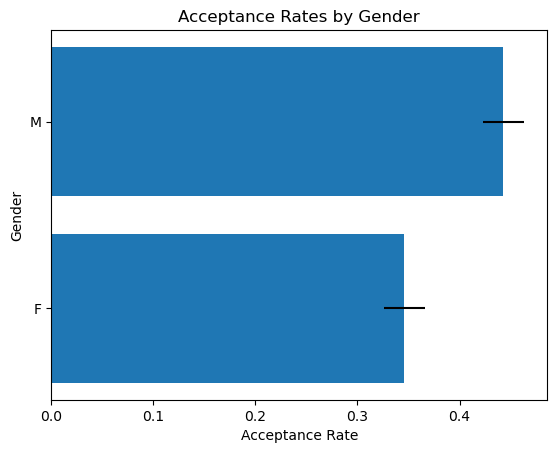

In [6]:
# Instructor_only / Solution

plt.barh(admissions_by_gender.index, admissions_by_gender["Acceptance Rate"], xerr=0.02)

plt.title("Acceptance Rates by Gender")
plt.xlabel("Acceptance Rate")
plt.ylabel("Gender")
plt.show()

**Question 2.2)** Using the same pivot table, create a stacked `bar` plot that visualizes this information. Your plot should clearly distinguish between accepted and rejected counts by stacking them within the same bar for each gender category. Don't forget to title your plot, label your axes, and display error bars!

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>It may be helpful to drop the `"Acceptance Rate"` column first in a temporary table. </i>  
- <i>`Matplotlib`'s `bar` documentation may be useful here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html </i>
- <i>You should be calling `plt.bar()` twice, utilizing the `bottom` parameter in one of them.</i>
- <i> For this plot, set the `yerr` parameters to 250 and 300. </i>

</details>

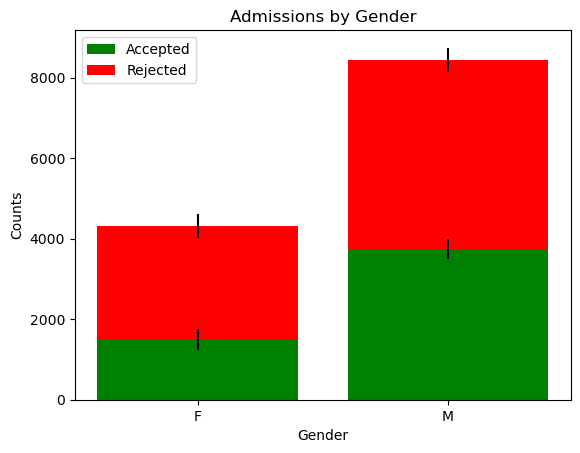

In [7]:
# Instructor_only / Solution

plt.bar(admissions_by_gender.index, admissions_by_gender['Accepted'], label='Accepted', color='green', yerr=250)
plt.bar(admissions_by_gender.index, admissions_by_gender['Rejected'], bottom=admissions_by_gender['Accepted'], label='Rejected', color='red', yerr=300)

plt.title('Admissions by Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.legend()
plt.show()

**Question 2.3)** Taking a look at the bar plots we just created, what observations can you make about the different proportions in admission trends between male and female applicants?

*Your Answer Here*

## **Question 3: Comprehensive Analysis**

Now that we've explored the data with respect to gender and admission rates, let's take a look at how gender plays a role in admission rates. 

**Question 3.1)** Create a pivot table `admissions_by_major` that displays the totals for accepted and rejected admissions per major.

In [8]:
# Instructor_only / Solution

admissions_by_major = pd.pivot_table(berkeley, index = "Major", columns = "Admission", aggfunc="size")
admissions_by_major

Admission,Accepted,Rejected
Major,,
A,914,332
B,370,215
C,321,597
D,269,523
E,147,437
F,47,667
Other,3164,4760


**Question 3.2)** Adding onto the `admissions_by_major` table, add a `"Counts"` column and an `"Acceptance Rate"` column, which shows the total amount of applicants and the acceptance rate for each major, respectively. 

`matplotlib`'s `bar` documentation may be useful here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>You should use the `"Counts"` column in some way to calculate the `"Acceptance Rate"` column.</i>

</details>

In [9]:
# Instructor_only / Solution

admissions_by_major['Counts'] = admissions_by_major['Accepted'] + admissions_by_major['Rejected']
admissions_by_major["Acceptance Rate"] = admissions_by_major['Accepted'] / admissions_by_major['Counts']
admissions_by_major

Admission,Accepted,Rejected,Counts,Acceptance Rate
Major,,,,
A,914,332,1246,0.733547
B,370,215,585,0.632479
C,321,597,918,0.349673
D,269,523,792,0.339646
E,147,437,584,0.251712
F,47,667,714,0.065826
Other,3164,4760,7924,0.399293


**Question 3.3)** Let's utilize data visualizations to help us really understand the data. Create a stacked `bar` plot similar to that of 2.2, plotting the stacked accepted and rejected counts of Majors A-F (excluding `"Other"`).

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i> Your implementation will likely be similar to your answer in <b>Question 2.2</b>. </i>
- <i> For this plot, set the `yerr` parameters to 40 and 60.</i>

</details>

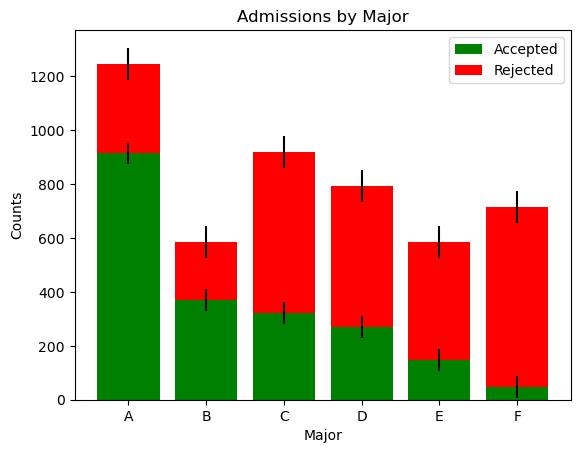

In [10]:
# Instructor_only / Solution

admissions_by_major_AF = admissions_by_major.drop(['Other'], axis=0)
plt.bar(admissions_by_major_AF.index, admissions_by_major_AF['Accepted'], label='Accepted', color='green', yerr=40)
plt.bar(admissions_by_major_AF.index, admissions_by_major_AF['Rejected'], bottom=admissions_by_major_AF['Accepted'], label='Rejected', color='red', yerr=60)

plt.title('Admissions by Major')
plt.xlabel('Major')
plt.ylabel('Counts')
plt.legend()
plt.show()

**Question 3.4)** Using the stacked `bar` plot and the `admissions_by_major` table, what observations can we make about the admission trends for each major? For reference, majors "A-F are the six majors with the most applicants in Fall 1973", which was stated here: https://discovery.cs.illinois.edu/dataset/berkeley/.

*Your Answer Here*

Now that we'e explored Gender and Major separately, let's analyze admission rates taking both into account.

**Question 3.5)** Using the `berkeley` dataset, calculate the number of acceptances, rejections, total applicants, and acceptance rate for each combination of major and gender. For clarity, your DataFrame should have the following columns: Major, Gender, Accepted, Rejected, Counts, and Acceptance Rate.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Start this problem by using `groupby` on the `"Major"` and `"Gender"` columns. Set this to `grouped_data`.</i>
- <i>Using `grouped_data`, calculate the counts for accepted, rejected, and total counts. 
- <i>`Pandas`' `apply` method and the helper functions provided may be useful here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html</i>
- <i>Your resulting DataFrame should resemble the table below:</i> <br> <br>
![3-5_Output](3-5_Output.png)

</details>

In [12]:
# Useful helper functions!
def accepted_count(x):
    return (x == "Accepted").sum()

def rejected_count(x):
    return (x == "Rejected").sum()

In [13]:
# Instructor_only / Solution

grouped_data = berkeley.groupby(['Major', 'Gender'])

acceptance_counts = grouped_data['Admission'].apply(accepted_count).rename('Accepted')
rejection_counts = grouped_data['Admission'].apply(rejected_count).rename('Rejected')
applicant_counts = grouped_data.size().rename('Counts')

acceptance_rate = (acceptance_counts / applicant_counts).rename('Acceptance Rate')

admissions_by_all = pd.concat([acceptance_counts, rejection_counts, applicant_counts, acceptance_rate], axis=1)
admissions_by_all.reset_index(inplace=True)
admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate
0,A,F,89,19,108,0.824074
1,A,M,825,313,1138,0.724956
2,B,F,17,8,25,0.680000
3,B,M,353,207,560,0.630357
4,C,F,201,392,593,0.338954
5,C,M,120,205,325,0.369231
6,D,F,131,244,375,0.349333
7,D,M,138,279,417,0.330935
8,E,F,94,299,393,0.239186
9,E,M,53,138,191,0.277487


**Question 3.6)** Construct a `bar` plot that visualizes the admission rates by gender within each major. We recommend using `seaborn` for this particular task, which was imported for you at the start.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>`Seaborn`'s `barplot` documentation may be helpful here: https://seaborn.pydata.org/generated/seaborn.barplot.html</i>
- <i>The `hue` parameter may also be helpful here.</i>
- <i> For this plot, set the `yerr` parameters to 0.02. </i>

</details>

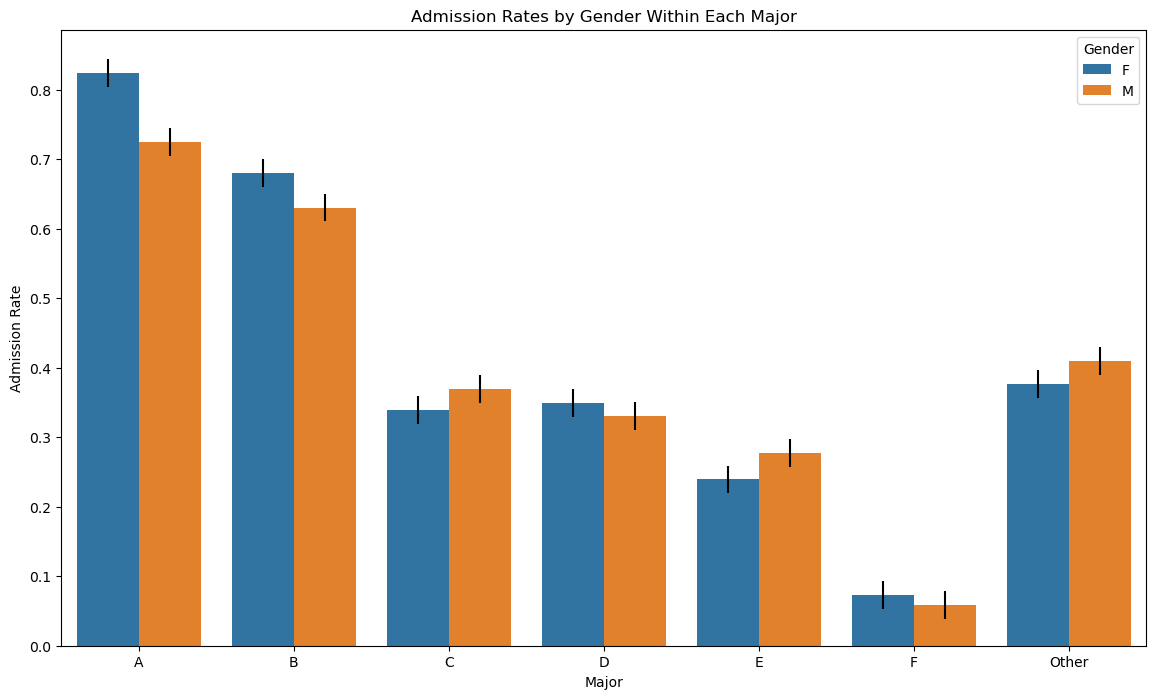

In [14]:
# Instructor_only / Solution

plt.figure(figsize=(14, 8))
sns.barplot(x='Major', y='Acceptance Rate', hue='Gender', data=admissions_by_all, yerr=0.02)
plt.title('Admission Rates by Gender Within Each Major')
plt.ylabel('Admission Rate')
plt.xlabel('Major')
plt.legend(title='Gender')
plt.show()

**Question 3.7)** Looking at the bar plot you made above, what do you conclude about the admission rates between male and female applicants? Is there any noticeable discrepency in the admission rates between male and female applicants, given the rates per major? How is it different from the observations you made in questions 1 and 2? *Bonus: How have your credence levels changed from Part 1?*

*Your Answer Here*

## **Question 4: Closing Thoughts**

What we just observed is a classic example of Simpson's Paradox, a statistical phenomenon where a trend that appears in different groups of data disappears or reverses when these groups are combined. This paradox occurs when underlying variables—often unaccounted for—affect the overall analysis, misleading the initial interpretations. This paradox is part of a broader set of considerations that need to be made when performing EDA, especially when removing data if deemed unnecessary for analysis. Analysts must also consider how reducing the dimesionally of data can affect the overall picture.

In the following questions, we'll delve further into how incomplete EDA and phenomena like Simpson's Paradox may pose as an invisible obstacle to comprehensive analysis.

**Question 4.1)** How can making premature observations and claims be harmful whem performing exploratory data analysis? What assumptions did you mistakenly make throughout the notebook? How does this relate to Base Rate Neglect? Answers may vary.

*Your Answer Here*

**Question 4.2)** Reflect on the role of a data analyst in public policy. How can analysts ensure that their reports are not misused or misinterpreted, especially in sensitive areas like admission rates and education policy? How might this contribute to peoples' Availability Heuristic? Answers may vary.

*Your Answer Here*

**Question 4.3)** Discuss the implications of incomplete or biased exploratory data analysis (EDA) in the context of this project. What might be the consequences of such analyses when they are used to inform policies or organizational decisions? Answers may vary.

*Your Answer Here*

**Question 4.4)** In a scenario where the state government wants to improve gender equity in admissions to major educational programs, how could the findings from your report inform their strategy? What additional data might be necessary to support robust policy-making? Answers may vary.

*Your Answer Here*

<br/>

<hr style="border: 1px solid #fdb515;" />

This is the end of the notebook! Great work!

          /\\_/\\      
         / o o  \\     
        (   "    ))    
         \\~(*)~//     
          \\~~~//      
